In [141]:
# from sklearn.datasets import fetch_openml
# from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# %matplotlib inline

# Dimension reduction and clustering libraries
import umap
# import hdbscan
# import sklearn.cluster as cluster
# from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


In [142]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def read_image(path: str):
    img = rgb2gray(plt.imread(path))
    img = img / 255.0
    return img

def scan_class(dir_path: str):
    from glob import glob

    pattern = f"{dir_path.removesuffix('/')}/*.png"

    dict_by_sizes = {}

    for file in glob(pattern):
        img = read_image(file)

        str_shape = f"{img.shape}"
        if str_shape not in dict_by_sizes:
            dict_by_sizes[str_shape] = []


        dict_by_sizes[str_shape].append((img, file))
    
    sizes = {k: len(v) for k, v in dict_by_sizes.items()}
    max_size_key = max(sizes, key=sizes.get) # type: ignore


    return dict_by_sizes[max_size_key]


In [177]:
blue = scan_class("artworks/blue")
green = scan_class("artworks/green")
orange = scan_class("artworks/orange")

blues = np.asarray([b[0].flatten() for b in blue])
blues_files = np.asarray([b[1] for b in blue])

greens = np.asarray([b[0].flatten() for b in green])
greens_files = np.asarray([b[1] for b in green])

oranges = np.asarray([b[0].flatten() for b in orange])
oranges_files = np.asarray([b[1] for b in orange])

print(blues.shape)
print(greens.shape)
print(oranges.shape)

pinsky_data = np.concatenate((blues, greens, oranges))
pinsky_target = np.concatenate([[0 for i in range(blues.shape[0])], [1 for i in range(greens.shape[0])], [2 for i in range(oranges.shape[0])]])
pinsky_hover_data = np.concatenate((blues_files, greens_files, oranges_files))

pinsky_data = pd.DataFrame(pinsky_data)
pinsky_hover_data = pd.DataFrame(pinsky_hover_data)

pinsky_hover_data["index"] = pinsky_hover_data.index
pinsky_hover_data["file"] = pinsky_hover_data[0]
pinsky_hover_data["label"] = pinsky_target
pinsky_hover_data["image"] = "<img src='" + pinsky_hover_data[0] + "' width='100'></img>"


pinsky_hover_data.drop(columns=[0], inplace=True)

# print(pinsky_data.shape)

(57, 136640)
(62, 136640)
(101, 136640)


In [156]:
pinsky_mapper = umap.UMAP(random_state=42).fit(pinsky_data)


/Users/bregy/Documents/pinsky-three/pinsky/.pixi/env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/Users/bregy/Documents/pinsky-three/pinsky/.pixi/env/lib/python3.9/site-packages/umap/plot.py:894: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

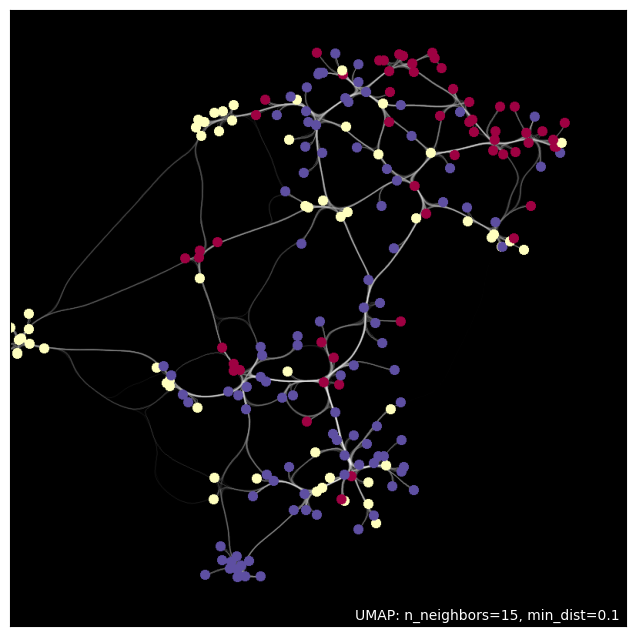

In [125]:
import umap.plot

umap.plot.connectivity(pinsky_mapper, labels=pinsky_target, theme='viridis', edge_bundling='hammer', show_points=True)
# umap.plot.show(p)

In [179]:
p = umap.plot.interactive(pinsky_mapper, labels=pinsky_target, hover_data=pinsky_hover_data, point_size=10, theme='viridis', tools=['hover', 'pan', 'wheel_zoom', 'reset'])
umap.plot.show(p)